In [1]:
import pandas as pd
import raw_to_def as rtd
import os
# let us test set b
train_path = '../data/dataset/set-a'
train_label_path = '../data/dataset/Outcomes-a.txt'

files = [f for f in os.listdir(train_path) if f.endswith(".txt")]
files.sort()

patient_data =[]
patient_outcomes =[]

for i in enumerate(files):
    data_path = os.path.join(train_path, files[i[0]])
    patient_data.append( pd.read_csv(data_path))
df = rtd.raw_to_df(patient_data)


patient_outcomes = pd.read_csv(train_label_path)
Mortality_labels = patient_outcomes["In-hospital_death"]
Mortality_labels


df

,RecordID,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,132539.0,54.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,185.0,732.0,NaN,NaN,37.8,NaN,NaN,6500.0,20.6,NaN
1,132540.0,76.0,1.0,2.0,175.3,NaN,NaN,NaN,NaN,NaN,...,135.0,NaN,581.0,7712.0,37.1,NaN,NaN,6214.0,33.8,81.6
2,132541.0,44.0,0.0,3.0,NaN,5.0,232.0,166.0,399.0,5.8,...,113.0,NaN,95.0,2011.0,37.2,NaN,NaN,5123.0,14.1,56.7
3,132543.0,68.0,1.0,3.0,180.3,4.4,105.0,12.0,15.0,0.2,...,284.0,912.0,NaN,NaN,37.0,NaN,NaN,3275.0,28.2,84.6
4,132545.0,88.0,0.0,3.0,NaN,3.3,NaN,NaN,NaN,NaN,...,97.0,920.0,NaN,NaN,36.7,NaN,NaN,2361.0,8.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,218.0,NaN,NaN,6096.0,36.9,NaN,NaN,1980.0,29.0,87.0
3996,142667.0,25.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,118.0,388.0,NaN,NaN,36.8,NaN,NaN,4675.0,14.2,166.4
3997,142670.0,44.0,1.0,3.0,NaN,NaN,51.0,20.0,20.0,0.5,...,229.0,NaN,NaN,754.0,38.4,NaN,NaN,4193.0,33.2,109.0
3998,142671.0,37.0,1.0,3.0,NaN,3.1,507.0,5913.0,5056.0,2.2,...,314.0,NaN,NaN,8664.0,37.4,NaN,NaN,146.0,52.1,87.4


In [2]:
df['MechVent']

0       False
1         1.0
2         1.0
3       False
4       False
        ...  
3995      1.0
3996    False
3997      1.0
3998      1.0
3999      1.0
Name: MechVent, Length: 4000, dtype: object

## Testing SimpleImputer Vs. IterativeImputer

In [3]:
# from sklearn.impute import SimpleImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# iterative_imp = IterativeImputer(random_state=0)
# X = df.drop(columns=['RecordID'])  # drop ID from features
# X_iteratively_imputed = iterative_imp.fit_transform(X)
# iter_imputed_df = pd.DataFrame(X_iteratively_imputed,columns = X.columns)
# iter_imputed_df

In [4]:
# imputer = SimpleImputer(strategy='median')  # You can try 'median' or 'most_frequent' too
# X = df.drop(columns=['RecordID'])  # drop ID from features
# X_simply_imputed = imputer.fit_transform(X)
# simple_imputed_df = pd.DataFrame(X_simply_imputed,columns = X.columns)
# simple_imputed_df


## Adding oversampling techniques for better test results

In [5]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=0)
# X_iter, y_iter = adasyn.fit_resample(iter_imputed_df, Mortality_labels)
# X_simple, y_simple = adasyn.fit_resample(simple_imputed_df, Mortality_labels)

## Cross-validation testing

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Average Accuracy: 0.8386
Average Precision: 0.3996
Average Recall: 0.3189
Average F1 Score: 0.3539
Average Se (Sensitivity): 0.3189
Average +P (Positive Predictivity): 0.3996
Average Score1 (min(Se, +P)): 0.3189
Aggregated Confusion Matrix:
 [[6355  535]
 [ 756  354]]


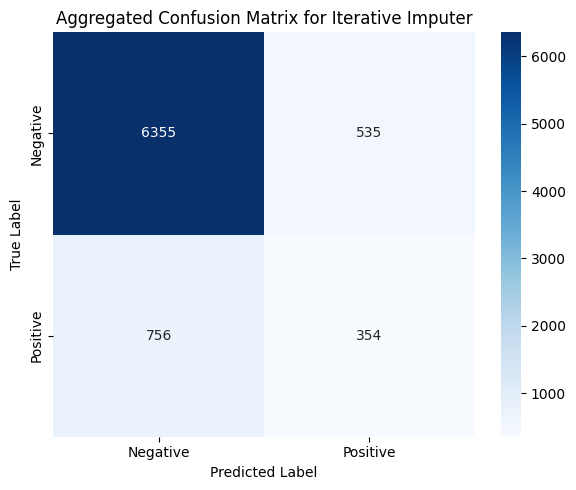

In [6]:
# Iterative Imputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
import numpy as np
from sklearn.neural_network import MLPClassifier


adasyn = ADASYN(random_state=42)
clf = RandomForestClassifier(random_state=42)

accs, precs, recalls, f1s = [], [], [], []
Se_list, Ppos_list, Score1_list = [], [], []
conf_matrix_sum = np.zeros((2, 2), dtype=int)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['RecordID']), Mortality_labels, test_size=0.2,
        stratify=Mortality_labels, random_state=42 + i
    )
    iterative_imp = IterativeImputer(random_state=0)
    X_train_imp = iterative_imp.fit_transform(X_train)
    X_test_imp = iterative_imp.transform(X_test)
    X_resampled, y_resampled = adasyn.fit_resample(X_train_imp, y_train)
    clf.fit(X_resampled, y_resampled)    
    y_pred = clf.predict(X_test_imp)
    
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))
    
    # Confusion matrix: [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix_sum += np.array([[tn, fp], [fn, tp]])
    
    # Challenge metrics
    Se = tp / (tp + fn) if (tp + fn) > 0 else 0
    Ppos = tp / (tp + fp) if (tp + fp) > 0 else 0
    Score1 = min(Se, Ppos)
    
    Se_list.append(Se)
    Ppos_list.append(Ppos)
    Score1_list.append(Score1)

print("Average Accuracy: {:.4f}".format(np.mean(accs)))
print("Average Precision: {:.4f}".format(np.mean(precs)))
print("Average Recall: {:.4f}".format(np.mean(recalls)))
print("Average F1 Score: {:.4f}".format(np.mean(f1s)))

print("Average Se (Sensitivity): {:.4f}".format(np.mean(Se_list)))
print("Average +P (Positive Predictivity): {:.4f}".format(np.mean(Ppos_list)))
print("Average Score1 (min(Se, +P)): {:.4f}".format(np.mean(Score1_list)))

print("Aggregated Confusion Matrix:\n", conf_matrix_sum)

import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sum, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Aggregated Confusion Matrix for Iterative Imputer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Average Accuracy: 0.8509
Average Precision: 0.4470
Average Recall: 0.3198
Average F1 Score: 0.3722
Average Se (Sensitivity): 0.3198
Average +P (Positive Predictivity): 0.4470
Average Score1 (min(Se, +P)): 0.3198
Aggregated Confusion Matrix:
 [[6452  438]
 [ 755  355]]


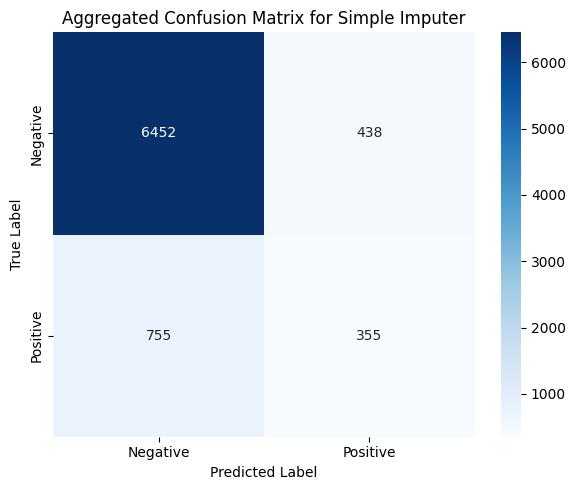

In [7]:
# Simple Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
import numpy as np

adasyn = ADASYN(random_state=42)
clf = RandomForestClassifier(random_state=42)

accs, precs, recalls, f1s = [], [], [], []
Se_list, Ppos_list, Score1_list = [], [], []
conf_matrix_sum = np.zeros((2, 2), dtype=int)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['RecordID']), Mortality_labels, test_size=0.2,
        stratify=Mortality_labels, random_state=42 + i
    )
    simpleimputer = SimpleImputer(strategy='median')
    X_train_smp = simpleimputer.fit_transform(X_train)
    X_test_smp = simpleimputer.transform(X_test)
    X_resampled, y_resampled = adasyn.fit_resample(X_train_smp, y_train)
    clf.fit(X_resampled, y_resampled)    
    y_pred = clf.predict(X_test_smp)
    
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))
    
    # Confusion matrix: [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix_sum += np.array([[tn, fp], [fn, tp]])
    
    # Challenge metrics
    Se = tp / (tp + fn) if (tp + fn) > 0 else 0
    Ppos = tp / (tp + fp) if (tp + fp) > 0 else 0
    Score1 = min(Se, Ppos)
    
    Se_list.append(Se)
    Ppos_list.append(Ppos)
    Score1_list.append(Score1)

print("Average Accuracy: {:.4f}".format(np.mean(accs)))
print("Average Precision: {:.4f}".format(np.mean(precs)))
print("Average Recall: {:.4f}".format(np.mean(recalls)))
print("Average F1 Score: {:.4f}".format(np.mean(f1s)))

print("Average Se (Sensitivity): {:.4f}".format(np.mean(Se_list)))
print("Average +P (Positive Predictivity): {:.4f}".format(np.mean(Ppos_list)))
print("Average Score1 (min(Se, +P)): {:.4f}".format(np.mean(Score1_list)))

print("Aggregated Confusion Matrix:\n", conf_matrix_sum)


import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sum, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Aggregated Confusion Matrix for Simple Imputer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



In [10]:
simpleimputer = SimpleImputer(strategy='median')
X = df.drop(columns=['RecordID'])  # drop ID from features
X_Aimputed = simpleimputer.fit_transform(X)
train_df = pd.DataFrame(X_Aimputed,columns = X.columns)


adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(train_df, Mortality_labels)

test_path = '../data/dataset/set-b'
test_label_path = '../data/dataset/Outcomes-b.txt'

test_files = [f for f in os.listdir(test_path) if f.endswith(".txt")]
test_files.sort()

test_patient_data =[]
test_patient_outcomes =[]

for i in enumerate(test_files):
    data_path = os.path.join(test_path, test_files[i[0]])
    test_patient_data.append( pd.read_csv(data_path))
test_df = rtd.raw_to_df(test_patient_data)
simpleimputer = SimpleImputer(strategy='median')
X = test_df.drop(columns=['RecordID'])  # drop ID from features
X_imputed = simpleimputer.fit_transform(X)
test_df = pd.DataFrame(X_imputed,columns = X.columns)

test_patient_outcomes = pd.read_csv(test_label_path)
test_Mortality_labels = test_patient_outcomes["In-hospital_death"]
test_df

,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,BUN,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,70.0,1.0,2.0,175.3,6.4,115.0,398.0,2835.0,10.2,109.0,...,41.0,947.0,1064.0,8032.0,37.6,4.6,0.28,16265.0,67.6,85.0
1,57.0,0.0,3.0,170.2,3.4,111.0,47.0,67.0,1.0,128.0,...,517.0,848.0,293.0,6302.0,37.6,4.6,0.28,4068.0,37.5,80.0
2,60.0,1.0,3.0,182.9,3.4,154.0,97.0,55.0,1.4,67.0,...,207.0,947.0,93.0,1535.0,38.4,4.6,0.28,5040.0,44.9,79.5
3,64.0,1.0,2.0,180.3,4.6,88.0,1753.0,2119.0,2.5,44.0,...,79.0,947.0,556.0,7077.0,37.0,4.6,0.28,5229.0,163.9,145.2
4,51.0,1.0,4.0,172.7,3.4,111.0,47.0,67.0,1.0,38.0,...,164.0,709.0,293.0,2644.0,38.7,4.6,0.28,2830.0,28.5,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,78.0,1.0,2.0,180.3,3.4,111.0,47.0,67.0,1.0,72.0,...,118.0,947.0,775.0,7627.0,36.3,4.6,0.28,5309.0,50.3,87.5
3996,90.0,1.0,3.0,177.8,3.4,74.0,12.0,25.0,1.0,382.0,...,191.0,947.0,283.0,11272.0,36.6,4.6,0.71,915.0,196.5,87.4
3997,70.0,0.0,2.0,152.4,2.8,88.0,11.0,21.0,1.0,89.0,...,160.0,838.0,98.0,2646.0,36.2,1.0,0.28,5573.0,43.0,79.3
3998,49.0,0.0,3.0,170.2,3.4,111.0,47.0,67.0,1.0,28.0,...,185.0,947.0,67.0,6302.0,36.1,4.6,0.28,5840.0,30.2,57.0


#### Models to use




✅ 1. Perceptron
##

from sklearn.linear_model import Perceptron
## 
✅ 2. Fisher’s Linear Discriminant (LDA)
##

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
##
✅ 3. Least Squares (Linear Regression for classification)
##

from sklearn.linear_model import RidgeClassifier  # or LogisticRegression for binary classification
##

✅ 4. Naive Bayes
##

from sklearn.naive_bayes import GaussianNB  # For continuous data
or
##

from sklearn.naive_bayes import MultinomialNB  # For count data
##

✅ 5. Non-Naive Bayes (e.g., Bayesian Ridge, or more advanced Bayes classifiers)
##

from sklearn.linear_model import BayesianRidge  # Not a classifier, but for regression
##

For non-naive Bayesian classifiers, you'd often use custom probabilistic models or PyMC3.
##

✅ 6. Logistic Regression
##

from sklearn.linear_model import LogisticRegression
##

✅ 7. K-Nearest Neighbors (KNN)
##

from sklearn.neighbors import KNeighborsClassifier
##

✅ 8. Support Vector Machines (SVM)
##

from sklearn.svm import SVC
##

✅ 9. Decision Trees
from sklearn.tree import DecisionTreeClassifier
##

✅ 10. Gradient Boosting
##

from sklearn.ensemble import GradientBoostingClassifier
or better:
from xgboost import XGBClassifier
##

✅ 11. Random Forest
##

from sklearn.ensemble import RandomForestClassifier
##

✅ 12. Artificial Neural Networks (ANN)
##

import torch
import torch.nn as nn

# Perceptron

Accuracy: 0.853
Precision: 0.411
Recall: 0.090
F1 Score: 0.147
AUC: 0.702


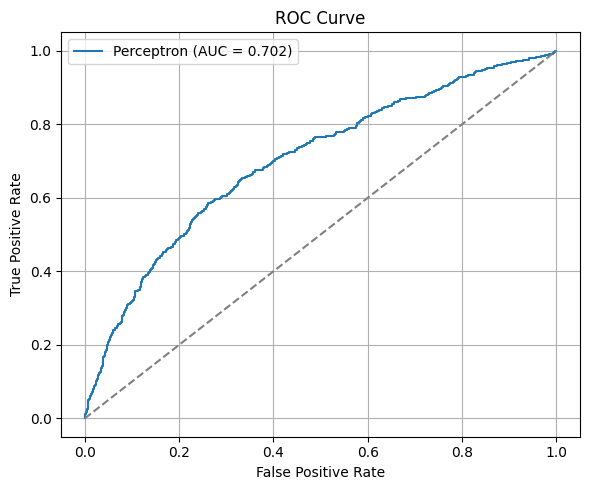

In [11]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

model = Perceptron(random_state=0)
model.fit(X_resampled,y_resampled)

y_pred = model.predict(test_df)

# Perceptron doesn't provide probabilities, so we use decision function
y_scores = model.decision_function(test_df)

accuracy = accuracy_score(test_Mortality_labels, y_pred)
precision = precision_score(test_Mortality_labels, y_pred)
recall = recall_score(test_Mortality_labels, y_pred)
f1 = f1_score(test_Mortality_labels, y_pred)
auc = roc_auc_score(test_Mortality_labels, y_scores)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(test_Mortality_labels, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



## Points observed about Perceptron
*   Recall is too low, meaning that only 9% of actual deaths are being detected.
*   Precision is moderate, At 41%, it suggests that when the model predicts a death, it is right less than half the time. While better than random guessing, it’s not reliable enough for clinical decisions.
*    Score1 (min of recall and precision): Would be 0.090, same as recall, reinforcing the idea that recall is the major limiting factor in this model’s utility.

# Fisher's Linear Discriminant

Accuracy: 0.760
Precision: 0.339
Recall: 0.727
F1 Score: 0.462
AUC: 0.817


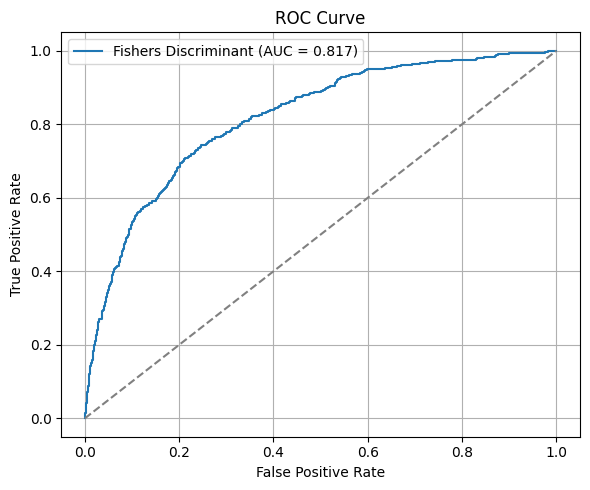

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
model.fit(X_resampled,y_resampled)

y_pred = model.predict(test_df)
y_scores = model.decision_function(test_df)

accuracy = accuracy_score(test_Mortality_labels, y_pred)
precision = precision_score(test_Mortality_labels, y_pred)
recall = recall_score(test_Mortality_labels, y_pred)
f1 = f1_score(test_Mortality_labels, y_pred)
auc = roc_auc_score(test_Mortality_labels, y_scores)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(test_Mortality_labels, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Fishers Discriminant (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



### Key Insights from LDA vs. Perceptron

- **LDA drastically improves recall**: Recall jumped from **0.090 (Perceptron)** to **0.727 (LDA)** — meaning LDA correctly identifies over 70% of actual in-hospital deaths, a crucial improvement for clinical relevance.

- **Higher AUC indicates better discrimination**: LDA achieved an AUC of **0.817** vs. Perceptron’s **0.702**, showing LDA is significantly better at distinguishing between patients who will survive and those who won't.

- **LDA sacrifices some precision and accuracy for better balance**: While accuracy dropped from **0.853 to 0.760** and precision from **0.411 to 0.339**, the overall **F1 score and Score1 metric improved**, making LDA the more clinically valuable model.


# Least Squares

Accuracy: 0.760
Precision: 0.339
Recall: 0.727
F1 Score: 0.462
AUC: 0.817


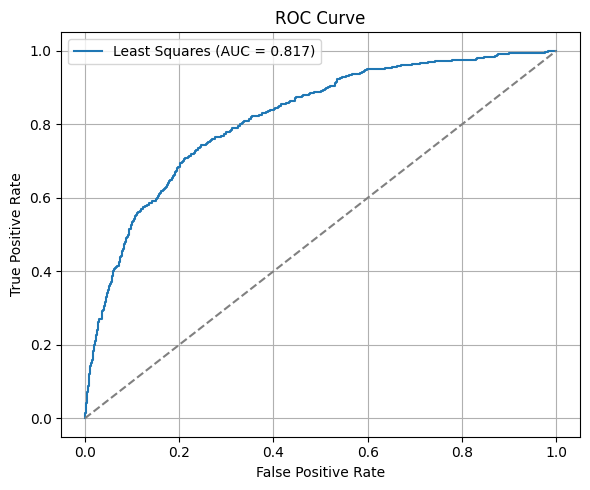

In [15]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model.fit(X_resampled,y_resampled)

y_pred = model.predict(test_df)
y_scores = model.decision_function(test_df)

accuracy = accuracy_score(test_Mortality_labels, y_pred)
precision = precision_score(test_Mortality_labels, y_pred)
recall = recall_score(test_Mortality_labels, y_pred)
f1 = f1_score(test_Mortality_labels, y_pred)
auc = roc_auc_score(test_Mortality_labels, y_scores)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# ROC Curve
fpr, tpr, _ = roc_curve(test_Mortality_labels, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Least Squares (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



### Least squares Interpretation

- Accuracy of 76% is decent but may be affected by class imbalance.
- Precision of 33.9% means about one-third of predicted deaths are correct.
- Recall of 72.7% is strong, capturing nearly three-quarters of actual deaths — critical in clinical settings.
- F1 Score reflects moderate balance between precision and recall.
- AUC of 0.817 indicates good ability to discriminate between death and survival.

# Naive Bayes

Accuracy: 0.634
Precision: 0.248
Recall: 0.776
F1 Score: 0.376
AUC: 0.741


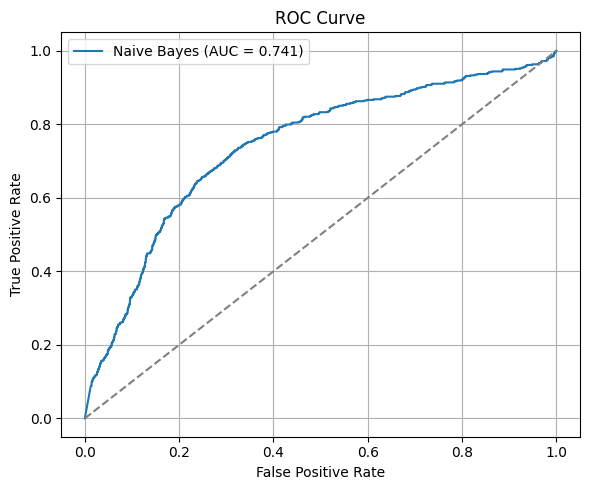

In [18]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(test_df)

y_probs = model.predict_proba(test_df)[:, 1]

accuracy = accuracy_score(test_Mortality_labels, y_pred)
precision = precision_score(test_Mortality_labels, y_pred)
recall = recall_score(test_Mortality_labels, y_pred)
f1 = f1_score(test_Mortality_labels, y_pred)
auc = roc_auc_score(test_Mortality_labels, y_probs)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(test_Mortality_labels, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Analysis of Naive Bayes Performance

- **Accuracy: 0.634**  
  Moderate overall correctness; the model correctly predicts about 63% of the cases.

- **Precision: 0.248**  
  Low precision indicates that only about 25% of the predicted deaths are true positives, meaning many false alarms.

- **Recall: 0.776**  
  High recall shows the model successfully detects about 78% of actual deaths, which is crucial in clinical settings where missing a death is costly.

- **F1 Score: 0.376**  
  The F1 score balances precision and recall but is limited by low precision here, resulting in a modest overall performance.

- **AUC: 0.741**  
  A decent Area Under the Curve, indicating reasonable discrimination between death and survival cases.


# Logistic Regression

Accuracy: 0.762
Precision: 0.344
Recall: 0.743
F1 Score: 0.470
AUC: 0.822


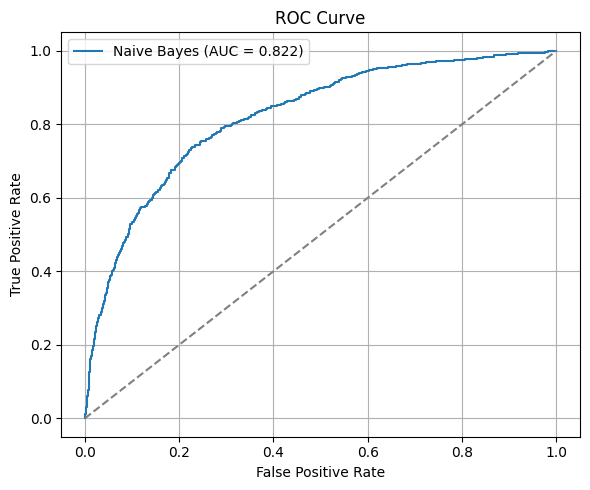

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Keep as DataFrame to preserve feature names
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_resampled), columns=train_df.columns)
X_test_scaled = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_resampled)

y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]


accuracy = accuracy_score(test_Mortality_labels, y_pred)
precision = precision_score(test_Mortality_labels, y_pred)
recall = recall_score(test_Mortality_labels, y_pred)
f1 = f1_score(test_Mortality_labels, y_pred)
auc = roc_auc_score(test_Mortality_labels, y_probs)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(test_Mortality_labels, y_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Logistic Regression Performance Summary

- **Accuracy: 0.762**  
  A strong overall accuracy, correctly predicting about 76% of all outcomes.

- **Precision: 0.344**  
  Moderate precision—around 34% of predicted in-hospital deaths are correct. Indicates some false positives, but better than naive guessing.

- **Recall: 0.743**  
  High recall—about 74% of actual deaths are correctly identified. This is valuable in healthcare, where missing a critical case is costly.

- **F1 Score: 0.470**  
  The F1 score balances precision and recall. A score of 0.47 reflects decent model utility, especially considering the class imbalance.

- **AUC: 0.822**  
  Excellent discriminatory power. An AUC of 0.822 means the model distinguishes well between death and survival cases.
